# Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

# Additional scklearn functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV   
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
rcParams['figure.figsize'] = 12, 4


/home/itachi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/itachi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Reading training dataset
we have to fill values in mvar3, mvar9

In [2]:
data = pd.read_csv("Training_Dataset.csv")

removing useless columns and create dummies and target variables

In [3]:
data.drop('mvar1', axis=1, inplace=True)

cool = pd.get_dummies(data['mvar12'])
data = pd.concat([data, cool], axis=1)
data.drop(['mvar12'], axis=1, inplace=True)

data['card_extension'] = data['mvar46'] + 2*data['mvar47'] + 3*data['mvar48']
data.drop(['mvar46', 'mvar47', 'mvar48'], axis=1, inplace=True)

data['card_acceptance'] = data['mvar49'] + 2*data['mvar50'] + 3*data['mvar51']
data.drop(['mvar49', 'mvar50', 'mvar51'], axis=1, inplace=True)

def is_zero(s):
    return s < 1

var3 = data.pivot_table(values=["mvar3"], index=["mvar2","mvar4","mvar14","mvar15"], aggfunc=np.mean)
var9 = data.pivot_table(values=["mvar9"], index=["mvar2","mvar4","mvar14","mvar15"], aggfunc=np.mean)

for i,row in data.loc[is_zero(data['mvar3']),:].iterrows():
    ind = tuple([row['mvar2'],row['mvar4'],row['mvar14']])
    data.loc[i,'mvar3'] = var3.loc[ind].values[0]
    
for i,row in data.loc[is_zero(data['mvar9']),:].iterrows():
    ind = tuple([row['mvar2'],row['mvar4'],row['mvar14']])
    data.loc[i,'mvar9'] = var9.loc[ind].values[0]


# Scaling and Spliting dataset
Split dataset into train and test dataframes

In [4]:
y_extension = data['card_extension']
y_acceptance = data['card_acceptance']

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

X_train, X_test,y_train_extension,y_test_extension,y_train_acceptance,y_test_acceptance = train_test_split(data,y_extension,y_acceptance, test_size=0.33)
X_train.columns

Index(['cm_key', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar13', 'mvar14', 'mvar15', 'mvar16',
       'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23',
       'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30',
       'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44',
       'mvar45', 'Apparel', 'Automotive         ', 'Construction       ',
       'Consumables        ', 'Durable goods      ', 'Entertainment      ',
       'Finance            ', 'Household          ', 'Manufacturing      ',
       'Mining             ', 'Misc services      ', 'Non durable goods  ',
       'Office supplies    ', 'Personal services  ', 'Produce            ',
       'Social services    ', 'Transport          ', 'Unknown            ',
       'card_extension', 'card_acceptance'],
      dtype='object')

In [5]:
X_train.drop(['cm_key','card_extension','card_acceptance','Finance            ', 'Entertainment      ', 'Manufacturing      ', 'Apparel','Transport          ', 'Produce            ', 'Construction       ', 'Mining             ', 'Durable goods      '], axis=1, inplace=True)
X_test.drop(['cm_key','card_extension','card_acceptance','Finance            ', 'Entertainment      ', 'Manufacturing      ', 'Apparel','Transport          ', 'Produce            ', 'Construction       ', 'Mining             ', 'Durable goods      '], axis=1, inplace=True)


/home/itachi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/itachi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# See data before training

In [6]:
print(X_train.columns)
X_train.head(10)

Index(['mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9',
       'mvar10', 'mvar11', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar17',
       'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24',
       'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31',
       'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38',
       'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45',
       'Automotive         ', 'Consumables        ', 'Household          ',
       'Misc services      ', 'Non durable goods  ', 'Office supplies    ',
       'Personal services  ', 'Social services    ', 'Unknown            '],
      dtype='object')


,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,mvar45,Automotive,Consumables,Household,Misc services,Non durable goods,Office supplies,Personal services,Social services,Unknown
587,0.363636,0.196802,0.333333,0.330508,0.098137,0.019720,0.000000,0.085333,0.0,0.730553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14338,0.000000,0.076093,0.166667,0.076271,0.170186,0.008660,0.000000,0.001349,0.0,0.278060,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27368,0.000000,0.113078,0.416667,0.652542,0.146170,0.500135,0.469030,0.037059,1.0,0.982274,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20046,0.090909,0.102211,0.416667,0.282486,0.223395,0.078311,0.130789,0.003011,1.0,0.253492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3581,0.000000,0.113078,0.416667,0.370056,0.128571,0.012440,0.130789,0.002316,0.0,0.421554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34678,0.000000,0.079951,0.250000,0.268362,0.064182,0.079681,0.000000,0.001783,0.0,0.519197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11380,0.000000,0.104594,0.333333,0.073446,0.078882,0.001840,0.207338,0.004610,0.0,0.140680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3543,0.000000,0.113078,0.416667,0.028249,0.000000,0.079681,0.000000,0.085333,0.0,0.286730,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
366,0.000000,0.264453,0.666667,0.028249,0.000000,0.002940,0.207338,0.006254,0.0,0.162634,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15970,0.181818,0.526444,0.583333,0.135593,0.369979,0.112981,0.000000,0.085333,0.0,0.595829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
def classifier_report(clf, X_train, y_train, X_test, y_test, predictors, n_classes=3, classes=[1,2,3],performCV=True, printFeatureImportance=True, cv_folds=2):
    
    #Fit classifies on traning dataset
    clf.fit(X_train[predictors], y_train)
    
    #Predict training and test set:
    dtrain_predictions = clf.predict(X_train[predictors])
    dtrain_predprob = clf.predict_proba(X_train[predictors])
    prediction = clf.predict(X_test[predictors])
    dtest_predprob = clf.predict_proba(X_test[predictors])
    
    #Print model report:
    print ("\nModel Report")
    print ("Train Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    print ("Test Accuracy : %.4g" % metrics.accuracy_score(y_test.values, prediction))

    y = label_binarize(y_train, classes=classes)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], dtrain_predprob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), dtrain_predprob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    print("AUC Score (Train): %f" % roc_auc["micro"])  
    
    y1 = label_binarize(y_test, classes=classes)
    # Compute ROC curve and ROC area for each class
    fpr1 = dict()
    tpr1 = dict()
    roc_auc1 = dict()
    for i in range(n_classes):
        fpr1[i], tpr1[i], _ = roc_curve(y1[:, i], dtest_predprob[:, i])
        roc_auc1[i] = auc(fpr1[i], tpr1[i])

    # Compute micro-average ROC curve and ROC area
    fpr1["micro"], tpr1["micro"], _ = roc_curve(y1.ravel(), dtest_predprob.ravel())
    roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])
    print("AUC Score (Test): %f" % roc_auc1["micro"])  
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Train Accuracy : 0.6413
Test Accuracy : 0.6072
AUC Score (Train): 0.835839
AUC Score (Test): 0.809453


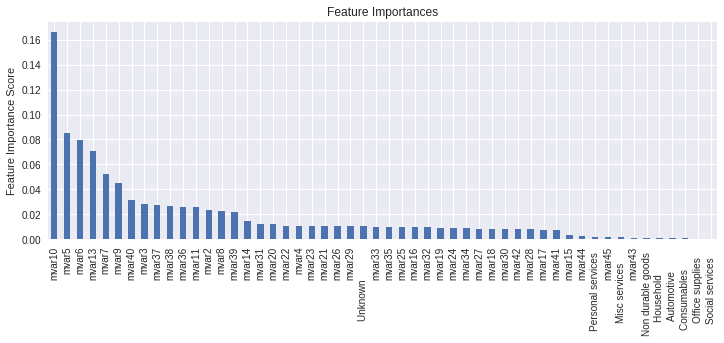

In [8]:
#Choose 0all predictors except target & IDcols
predictors = [x for x in X_train.columns]


gbm = GradientBoostingClassifier(learning_rate=0.001, 
                                         n_estimators=5000,
                                         max_depth=9, 
                                         min_samples_split=1000, 
                                         min_samples_leaf=40, 
                                         subsample=0.65,
                                         max_features=7)

classifier_report(gbm, X_train, y_train_extension, X_test, y_test_extension, predictors)


Model Report
Train Accuracy : 0.809
Test Accuracy : 0.7743
AUC Score (Train): 0.960411
AUC Score (Test): 0.920965


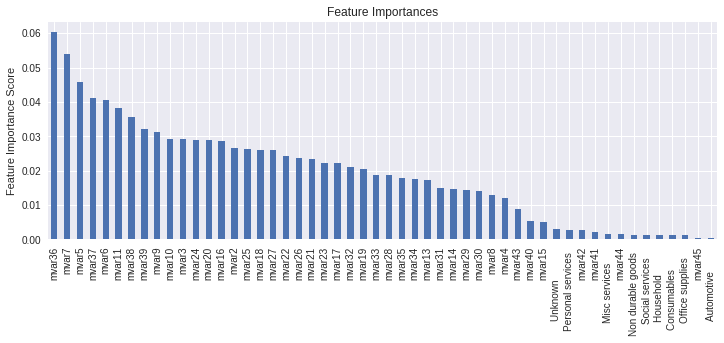

In [9]:
gbm1 = GradientBoostingClassifier(learning_rate=0.01, 
                                         n_estimators=1500,
                                         max_depth=9, 
                                         min_samples_split=1200, 
                                         min_samples_leaf=60, 
                                         subsample=0.85, random_state=10, 
                                         max_features=7,
                                         warm_start=True)
ty of Z is small t
classifier_report(gbm1, X_train, y_train_acceptance, X_test, y_test_acceptance, predictors, 4, [0,1,2,3])

# Preprocessing leaderboard dataset

In [10]:
haha = pd.read_csv("Leaderboard_Dataset.csv")
haha.drop('mvar1', axis=1, inplace=True)
cool = pd.get_dummies(haha['mvar12'])
haha = pd.concat([haha, cool], axis=1)
haha.drop(['mvar12'], axis=1, inplace=True)
haha.drop(['cm_key','Finance            ', 'Entertainment      ', 'Manufacturing      ', 'Apparel','Transport          ', 'Produce            ', 'Construction       ', 'Mining             ', 'Durable goods      '], axis=1, inplace=True)

scaler = MinMaxScaler()
haha = pd.DataFrame(scaler.fit_transform(haha), columns=haha.columns)

# Predict card name and write in dataframe

In [11]:
ext_pred = gbm.predict(haha)
con_pred = gbm1.predict(haha)

sample = pd.DataFrame({
        "cm_key": np.array(list(range(50001, 60001))),
        "ext_pred": ext_pred,
        "con_pred": con_pred
    })

sample['ext_pred'].replace([1,2,3],['Supp','Elite','Credit'],inplace=True)
sample['con_pred'].replace([0,1,2,3],['No','Supp','Elite','Credit'],inplace=True)

In [12]:
unique, counts = np.unique(con_pred, return_counts=True)
print('full confidence')
print(np.asarray((unique, counts)).T)

print("**********************")
unique, counts = np.unique(ext_pred, return_counts=True)
print("chances of card")
print(np.asarray((unique, counts)).T)

full confidence
[[   0 9506]
 [   1  109]
 [   2   20]
 [   3  365]]
**********************
chances of card
[[   1 5793]
 [   2 3795]
 [   3  412]]


random state 42

In [13]:
data1 = sample[sample['con_pred'] != 'No']
data2 = sample[sample['con_pred'] == 'No'].sort_values('ext_pred')

In [14]:
data1 = data1[data1['con_pred'] == data1['ext_pred']]

In [15]:
data1

,cm_key,con_pred,ext_pred
4,50005,Elite,Elite
15,50016,Elite,Elite
74,50075,Credit,Credit
85,50086,Credit,Credit
126,50127,Supp,Supp
129,50130,Credit,Credit
180,50181,Credit,Credit
189,50190,Supp,Supp
213,50214,Credit,Credit
229,50230,Credit,Credit


In [16]:
data2

,cm_key,con_pred,ext_pred
5015,55016,No,Credit
1687,51688,No,Credit
1686,51687,No,Credit
6811,56812,No,Credit
6813,56814,No,Credit
6815,56816,No,Credit
6816,56817,No,Credit
6827,56828,No,Credit
6832,56833,No,Credit
1666,51667,No,Credit


In [17]:
perfect = pd.concat([data1,data2])
perfect

,cm_key,con_pred,ext_pred
4,50005,Elite,Elite
15,50016,Elite,Elite
74,50075,Credit,Credit
85,50086,Credit,Credit
126,50127,Supp,Supp
129,50130,Credit,Credit
180,50181,Credit,Credit
189,50190,Supp,Supp
213,50214,Credit,Credit
229,50230,Credit,Credit


In [20]:
perfect.drop('con_pred', axis=1, inplace=True)
perfect[:1000].to_csv('Hawkeye_IITRoorkee_8.csv', index=False, header=False)

ValueError: labels ['con_pred'] not contained in axis

(array([ 17033.,      0.,      0.,      0.,      0.,  11656.,      0.,
             0.,      0.,  11311.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

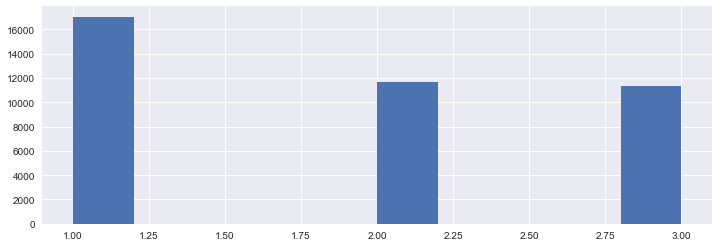

In [31]:
plt.hist(y_extension)